# Part I - Introduction

**Project Goal:** 
Predicting Customer Lifetime Value (CLV) for an eCommerce company.

Background: For any marketing professional it is essential to be able to estimate an expected return from a marketing campaign and a customers' total worth to the business. The CLV is a key metric that helps not only to determine an adequat marketing spend, monitoring acquisition costs for new and identify the high-value customers.

**Learning Objectives:**
1. Prepare transaction data for regression, 
2. Engineer features for regression analysis, 
3. Perform and evaluate regression model(s) 
4. Interpreting results and formulate further recommendations for the marketing department

**Predictive Analytics Methods:**
- Simple Linear Regression
- Multivariate Linear Regression 

**About the data:**
The used Data set features online retail transactions taken between 2010 and 2011 for a UK-based and registered non-store online retailer. It contains all purchases during an eight month period. This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011. The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

**Attribute information:**

**InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation

**StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

**Description:** Product (item) name. Nominal

**Quantity:** The quantities of each product (item) per transaction. Numeric

**InvoiceDate:** Invoice Date and time. Numeric, the day and time when each transaction was generated

**UnitPrice:** Unit price. Numeric, Product price per unit in sterling

**CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer

**Country:** Country name. Nominal, the name of the country where each customer resides.

## Import Libraries 

In [5]:
%matplotlib inline

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Load Data

In [40]:
#df = pd.read_excel('../data/Online Retail.xlsx', sheet_name='Online Retail')
df = pd.read_excel('/Users/Annie/Documents/GitHub/IronAnne/Labs/21_Mid-Term Project/online_retail_II_clean_final.xlsx')

## EDA

In [8]:
df.shape

(785318, 8)

In [9]:
df.head()

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785318 entries, 0 to 785317
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice       785318 non-null  int64         
 1   stock_code    785318 non-null  object        
 2   description   785318 non-null  object        
 3   quantity      785318 non-null  int64         
 4   invoice_date  785318 non-null  datetime64[ns]
 5   unit_price    785318 non-null  float64       
 6   customer_id   785318 non-null  int64         
 7   country       785318 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 47.9+ MB


In [11]:
df.describe()

,invoice,quantity,unit_price,customer_id
count,785318.000000,785318.000000,785318.000000,785318.000000
mean,536451.265673,13.247991,2.938092,15338.524703
std,26163.977050,112.997992,4.302194,1693.303093
min,489434.000000,1.000000,0.030000,12346.000000
25%,514369.000000,2.000000,1.250000,13988.000000
50%,536405.000000,5.000000,1.950000,15281.000000
75%,560018.000000,12.000000,3.750000,16806.000000
max,579885.000000,74215.000000,649.500000,18287.000000


In [12]:
# Check unique customers 
df["customer_id"].nunique()

5824

In [13]:
# customers per countries
customers_per_country = df.groupby("country").customer_id.nunique()
customers_per_country

country
Australia                 15
Austria                   13
Bahrain                    2
Belgium                   29
Brazil                     2
Canada                     5
Channel Islands           13
Cyprus                    11
Czech Republic             1
Denmark                   11
EIRE                       3
European Community         1
Finland                   12
France                    92
Germany                  106
Greece                     4
Iceland                    1
Israel                     4
Italy                     17
Japan                     10
Korea                      2
Lebanon                    1
Lithuania                  1
Malta                      2
Netherlands               22
Nigeria                    1
Norway                    12
Poland                     6
Portugal                  23
RSA                        2
Saudi Arabia               1
Singapore                  1
Spain                     37
Sweden                    19
Switze

In [14]:
# unique countries 
df["country"].nunique()

41

### Unit price of selling products 

In [15]:
df["unit_price"].describe(percentiles = [.99])

count    785318.000000
mean          2.938092
std           4.302194
min           0.030000
50%           1.950000
99%          12.750000
max         649.500000
Name: unit_price, dtype: float64

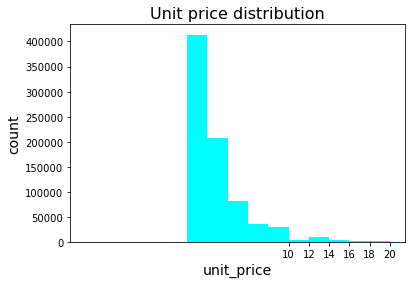

In [16]:
# Let's look at the price distribution of the products
bins = np.arange(-10, 21, 2)
ticks = np.arange(10, 21, 2)

plt.hist(data = df, x = "unit_price", bins=bins, color = "cyan")
plt.xticks(ticks, ticks)
plt.xlabel("unit_price", fontsize=14)
plt.ylabel("count", fontsize=14)
plt.title("Unit price distribution", fontsize=16);

### Quantity of Products 

In [17]:
df["quantity"].describe(percentiles = [.99])

count    785318.000000
mean         13.247991
std         112.997992
min           1.000000
50%           5.000000
99%         128.000000
max       74215.000000
Name: quantity, dtype: float64

Text(0.5, 1.0, 'Distribution of quantity of products')

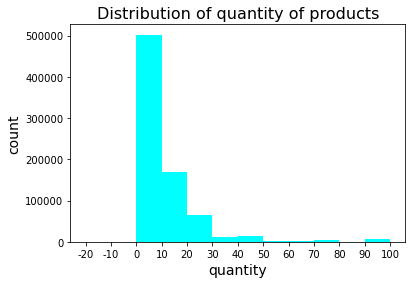

In [18]:
bins = np.arange(-20, 110, 10)
ticks = np.arange(-20, 110, 10)
plt.hist(data = df, x = "quantity", bins = bins, color = "cyan")
plt.xticks(ticks, ticks)
plt.xlabel("quantity", fontsize=14)
plt.ylabel("count", fontsize=14)
plt.title("Distribution of quantity of products", fontsize = 16)

In [19]:
df.shape

(785318, 8)

In [20]:
#### Conclusion: negative quantities may lead to distorted results in the model 

### Number of Purchases

In [21]:
df['invoice'].nunique()

35815

## Data Clean-Up

### Dealing with Negative Quantity / Price

In [22]:
df.loc[df['quantity'] <= 0].shape

(0, 8)

In [23]:
df.shape

(785318, 8)

In [24]:
df = df.loc[df['quantity'] > 0]

In [25]:
df.shape

(785318, 8)

In [26]:
negative = df["unit_price"] <=0
negative

#df = df.loc[df["unit_price"] != 0]

0         False
1         False
2         False
3         False
4         False
          ...  
785313    False
785314    False
785315    False
785316    False
785317    False
Name: unit_price, Length: 785318, dtype: bool

#### Drop NaN (Missing Customer ID) 

In [27]:
pd.isnull(df['customer_id']).sum()

0

In [28]:
df = df[pd.notnull(df['customer_id'])]

In [29]:
#invoice: the letter "C" indicates a cancelation, hence the values which do not contain "C" code are selected
df = df[df["invoice"].astype(str).str.contains("C", na=False)]

#### Excluding Incomplete Month

In [30]:
print('Date Range: %s ~ %s' % (df['invoice_date'].min(), df['invoice_date'].max()))

Date Range: NaT ~ NaT


In [31]:
df.loc[df['invoice_date'] >= '2011-12-01'].shape

(0, 8)

In [32]:
df.shape

(0, 8)

In [33]:
df = df.loc[df['invoice_date'] < '2011-12-01']

In [34]:
df.shape

(0, 8)

#### Adjust Wrong Data Types 

In [35]:
#convert customer_id
df = df.astype({"customer_id":"int"})

In [36]:
#remove time stamp from invoice_date 
df["invoice_date"] = df[["invoice_date"]].apply(pd.to_datetime)

#retail_df["invoice_date"] = pd.to_datetime(df["invoice_date"], infer_datetime_format=True).dt.date

In [39]:
display(df["invoice_date"].dtypes)

dtype('<M8[ns]')

## START HERE

#### Add new column - Total Sales

In [21]:
df['sales'] = df['quantity'] * df['unit_price']

In [22]:
df.head()

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


#### - Per Order Data

In [23]:
orders_df = df.groupby(['customer_id', 'invoice']).agg({
    'sales': sum,
    'invoice_date': max
})

In [24]:
orders_df

sales        invoice_date
customer_id invoice                              
12346       499763      27.05 2010-03-02 13:08:00
            513774     142.31 2010-06-28 13:53:00
            541431   77183.60 2011-01-18 10:01:00
12347       529924     611.53 2010-10-31 14:20:00
            537626    1423.58 2010-12-07 14:57:00
...                       ...                 ...
18287       523290      30.60 2010-09-21 12:19:00
            534346     331.50 2010-11-22 11:51:00
            554065     765.28 2011-05-22 10:39:00
            570715    1001.32 2011-10-12 10:23:00
            573167      70.68 2011-10-28 09:29:00

[35815 rows x 2 columns]

## Summary 

1. Small number of clients except UK (e. g. Ireland has 2nd highest revenue, but only 3 customers) --> Decision: Focus on the UK (only) 

2. Negative quantity of products --> Decision: Delete negative quantities

3. Removed rows where price less than or equal 0 

4. Dropped Incomplete Data (many blanks in Customer_id)

6. Dropped negative quantities

7. Added new revenue column for further analysis

# 3. Data Analysis

#### Time-series Number of Orders

In [ ]:
# function resamples and converts time series data into a certain frequency 

In [227]:
monthly_orders_df = df.set_index('invoice_date')['invoice'].resample('M').nunique()

In [228]:
monthly_orders_df

invoice_date
2009-12-31    1497
2010-01-31     959
2010-02-28    1093
2010-03-31    1509
2010-04-30    1315
2010-05-31    1365
2010-06-30    1479
2010-07-31    1362
2010-08-31    1276
2010-09-30    1659
2010-10-31    2108
2010-11-30    2570
2010-12-31    1394
2011-01-31     983
2011-02-28     992
2011-03-31    1312
2011-04-30    1139
2011-05-31    1544
2011-06-30    1390
2011-07-31    1321
2011-08-31    1267
2011-09-30    1739
2011-10-31    1902
2011-11-30    2640
Freq: M, Name: invoice, dtype: int64

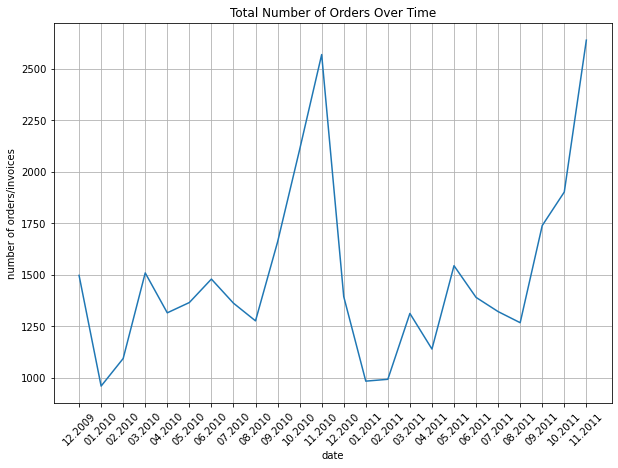

In [229]:
ax = pd.DataFrame(monthly_orders_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

plt.xticks(
    range(len(monthly_orders_df.index)), 
    [x.strftime('%m.%Y') for x in monthly_orders_df.index], 
    rotation=45
)

plt.show()

#### Time-series Number of Revenue

In [230]:
monthly_revenue_df = df.set_index('invoice_date')['sales'].resample('M').sum()

In [231]:
monthly_revenue_df

invoice_date
2009-12-31     681066.22
2010-01-31     535229.37
2010-02-28     499749.68
2010-03-31     668577.19
2010-04-30     587753.77
2010-05-31     594886.54
2010-06-30     631504.85
2010-07-31     583388.53
2010-08-31     596579.22
2010-09-30     808145.06
2010-10-31    1015124.74
2010-11-30    1161854.41
2010-12-31     877014.47
2011-01-31     564026.64
2011-02-28     443346.02
2011-03-31     584562.85
2011-04-30     455266.91
2011-05-31     660466.90
2011-06-30     654282.56
2011-07-31     592566.90
2011-08-31     636672.24
2011-09-30     940810.81
2011-10-31    1005519.90
2011-11-30    1141746.77
Freq: M, Name: sales, dtype: float64

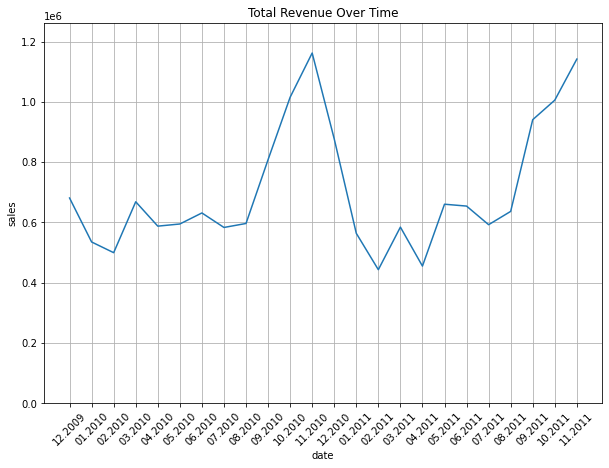

In [232]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue Over Time')

ax.set_ylim([0, max(monthly_revenue_df.values)+100000])

plt.xticks(
    range(len(monthly_revenue_df.index)), 
    [x.strftime('%m.%Y') for x in monthly_revenue_df.index], 
    rotation=45
)

plt.show()

#### Time-series Repeat Customers

In [233]:
invoice_customer_df = df.groupby(
    by=['invoice', 'invoice_date']
).agg({
    'sales': sum,
    'customer_id': max,
    'country': max,
}).reset_index()

In [235]:
monthly_repeat_customers_df = invoice_customer_df.set_index('invoice_date').groupby([
    pd.Grouper(freq='M'), 'customer_id'
]).filter(lambda x: len(x) > 1).resample('M').nunique()['customer_id']

In [237]:
monthly_unique_customers_df = df.set_index('invoice_date')['customer_id'].resample('M').nunique()

In [238]:
monthly_unique_customers_df

invoice_date
2009-12-31     951
2010-01-31     701
2010-02-28     771
2010-03-31    1051
2010-04-30     939
2010-05-31     965
2010-06-30    1034
2010-07-31     924
2010-08-31     910
2010-09-30    1136
2010-10-31    1492
2010-11-30    1606
2010-12-31     884
2011-01-31     739
2011-02-28     757
2011-03-31     973
2011-04-30     853
2011-05-31    1054
2011-06-30     990
2011-07-31     946
2011-08-31     933
2011-09-30    1259
2011-10-31    1361
2011-11-30    1660
Freq: M, Name: customer_id, dtype: int64

In [239]:
monthly_repeat_percentage = monthly_repeat_customers_df/monthly_unique_customers_df*100.0
monthly_repeat_percentage

invoice_date
2009-12-31    29.547844
2010-01-31    19.828816
2010-02-28    21.919585
2010-03-31    22.454805
2010-04-30    21.192758
2010-05-31    23.108808
2010-06-30    24.468085
2010-07-31    26.948052
2010-08-31    24.065934
2010-09-30    23.767606
2010-10-31    23.525469
2010-11-30    32.503113
2010-12-31    29.638009
2011-01-31    20.433018
2011-02-28    19.815059
2011-03-31    20.554985
2011-04-30    19.460727
2011-05-31    26.280835
2011-06-30    22.121212
2011-07-31    23.678647
2011-08-31    20.578778
2011-09-30    21.286736
2011-10-31    22.850845
2011-11-30    32.168675
Freq: M, Name: customer_id, dtype: float64

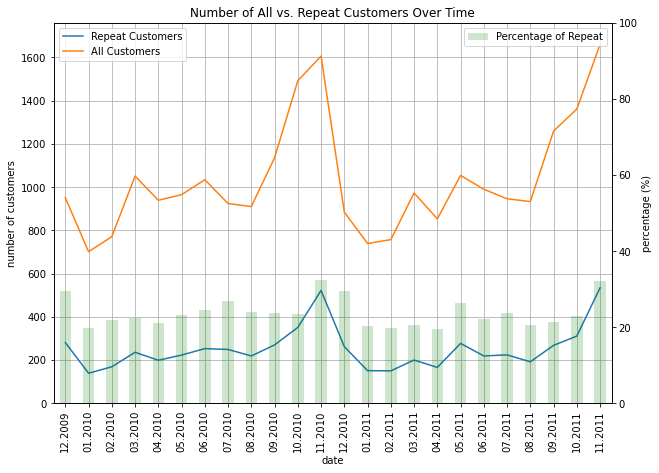

In [240]:
ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(
    figsize=(10,7)
)

pd.DataFrame(monthly_unique_customers_df.values).plot(
    ax=ax,
    grid=True
)


ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(
    ax=ax,
    grid=True,
    secondary_y=True,
    color='green',
    alpha=0.2
)

ax.set_xlabel('date')
ax.set_ylabel('number of customers')
ax.set_title('Number of All vs. Repeat Customers Over Time')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')

ax.set_ylim([0, monthly_unique_customers_df.values.max()+100])
ax2.set_ylim([0, 100])

plt.xticks(
    range(len(monthly_repeat_customers_df.index)), 
    [x.strftime('%m.%Y') for x in monthly_repeat_customers_df.index], 
    rotation=45
)

plt.show()

In [25]:
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    return (x.max() - x.min()).days/x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

In [26]:
summary_df = orders_df.reset_index().groupby('customer_id').agg({
    'sales': [min, max, sum, groupby_mean, groupby_count],
    'invoice_date': [min, max, purchase_duration, avg_frequency]
})

In [27]:
summary_df

sales                                          \
                 min       max       sum           avg count   
customer_id                                                    
12346          27.05  77183.60  77352.96  25784.320000   3.0   
12347         382.52   1423.58   5408.50    772.642857   7.0   
12348         187.44    652.80   1658.40    331.680000   5.0   
12349        1068.52   1457.55   3678.69   1226.230000   3.0   
12350         294.40    294.40    294.40    294.400000   1.0   
...              ...       ...       ...           ...   ...   
18283           1.95    313.65   2522.70    120.128571  21.0   
18284         411.68    411.68    411.68    411.680000   1.0   
18285         377.00    377.00    377.00    377.000000   1.0   
18286         412.95    833.48   1246.43    623.215000   2.0   
18287          30.60   1071.61   4132.99    590.427143   7.0   

                   invoice_date                                        \
                            min                 max purchase_duration   
customer_id                                                             
12346       2010-03-02 13:08:00 2011-01-18 10:01:00               321   
12347       2010-10-31 14:20:00 2011-10-31 12:25:00               364   
12348       2010-09-27 14:59:00 2011-09-25 13:13:00               362   
12349       2010-04-29 13:20:00 2011-11-21 09:51:00               570   
12350       2011-02-02 16:01:00 2011-02-02 16:01:00                 0   
...                         ...                 ...               ...   
18283       2010-02-19 17:16:00 2011-11-30 12:59:00               648   
18284       2010-10-04 11:33:00 2010-10-04 11:33:00                 0   
18285       2010-02-17 10:24:00 2010-02-17 10:24:00                 0   
18286       2009-12-16 10:45:00 2010-08-20 11:57:00               247   
18287       2010-05-17 11:55:00 2011-10-28 09:29:00               528   

                                
            purchase_frequency  
customer_id                     
12346               107.000000  
12347                52.000000  
12348                72.400000  
12349               190.000000  
12350                 0.000000  
...                        ...  
18283                30.857143  
18284                 0.000000  
18285                 0.000000  
18286               123.500000  
18287                75.428571  

[5824 rows x 9 columns]

In [28]:
summary_df.columns = ['_'.join(col).lower() for col in summary_df.columns]

In [29]:
summary_df

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoice_date_min,invoice_date_max,invoice_date_purchase_duration,invoice_date_purchase_frequency
customer_id,,,,,,,,,
12346,27.05,77183.60,77352.96,25784.320000,3.0,2010-03-02 13:08:00,2011-01-18 10:01:00,321,107.000000
12347,382.52,1423.58,5408.50,772.642857,7.0,2010-10-31 14:20:00,2011-10-31 12:25:00,364,52.000000
12348,187.44,652.80,1658.40,331.680000,5.0,2010-09-27 14:59:00,2011-09-25 13:13:00,362,72.400000
12349,1068.52,1457.55,3678.69,1226.230000,3.0,2010-04-29 13:20:00,2011-11-21 09:51:00,570,190.000000
12350,294.40,294.40,294.40,294.400000,1.0,2011-02-02 16:01:00,2011-02-02 16:01:00,0,0.000000
...,...,...,...,...,...,...,...,...,...
18283,1.95,313.65,2522.70,120.128571,21.0,2010-02-19 17:16:00,2011-11-30 12:59:00,648,30.857143
18284,411.68,411.68,411.68,411.680000,1.0,2010-10-04 11:33:00,2010-10-04 11:33:00,0,0.000000
18285,377.00,377.00,377.00,377.000000,1.0,2010-02-17 10:24:00,2010-02-17 10:24:00,0,0.000000


In [30]:
summary_df.shape

(5824, 9)

In [219]:
summary_df = summary_df.loc[summary_df['invoice_date_purchase_duration'] > 0]

In [220]:
summary_df.shape

(4112, 9)

In [ ]:
#percentage repeat customer vs non-repeat customer

In [256]:
percent = 4112/5824
percent

0.7060439560439561

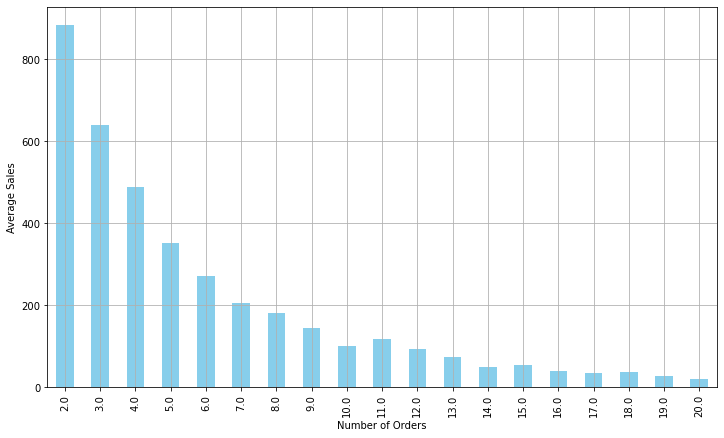

In [259]:
ax = summary_df.groupby('sales_count').count()['sales_avg'][:20].plot(
    kind='bar', 
    color='skyblue',
    figsize=(12,7), 
    grid=True
)

ax.set_ylabel('Average Sales')
ax.set_xlabel('Number of Orders')

plt.show()

In [258]:
summary_df['sales_count'].describe()

count    4112.000000
mean        8.274805
std        14.374102
min         2.000000
25%         3.000000
50%         5.000000
75%         9.000000
max       364.000000
Name: sales_count, dtype: float64

- Majority (75%) < 9 purchases

In [42]:
summary_df['sales_avg'].describe()

count     4112.000000
mean       385.949691
std        589.382473
min          3.725000
25%        200.427500
50%        301.471667
75%        434.868750
max      25784.320000
Name: sales_avg, dtype: float64

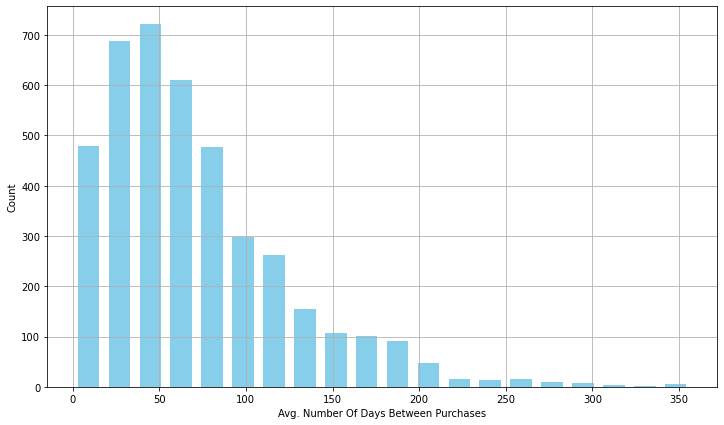

In [260]:
ax = summary_df['invoice_date_purchase_frequency'].hist(
    bins=20,
    color='skyblue',
    rwidth=0.7,
    figsize=(12,7)
)

ax.set_xlabel('Avg. Number Of Days Between Purchases')
ax.set_ylabel('Count')

plt.show()

In [45]:
summary_df['invoice_date_purchase_frequency'].describe()

count    4112.000000
mean       70.927758
std        53.058490
min         0.250000
25%        32.571429
50%        58.050000
75%        95.208333
max       357.000000
Name: invoice_date_purchase_frequency, dtype: float64

In [46]:
summary_df['invoice_date_purchase_duration'].describe()

count    4112.000000
mean      380.839737
std       223.244850
min         1.000000
25%       181.000000
50%       385.000000
75%       585.000000
max       729.000000
Name: invoice_date_purchase_duration, dtype: float64

#### Normality check 

In [ ]:
#sns.pairplot(summary_df)
#plt.show()

/Users/testaccount/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales_avg', ylabel='Density'>

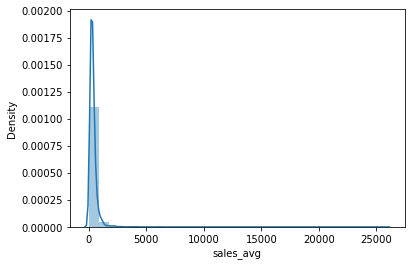

In [211]:
sns.distplot((summary_df['sales_avg']), bins=30)

/Users/testaccount/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='invoice_date_purchase_frequency', ylabel='Density'>

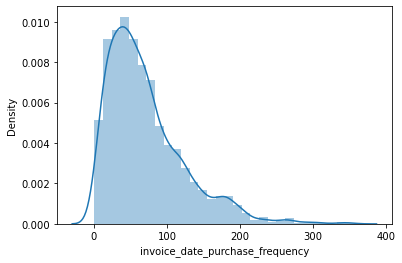

In [214]:
sns.distplot((summary_df['invoice_date_purchase_frequency']), bins=30)

/Users/testaccount/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='invoice_date_purchase_duration', ylabel='Density'>

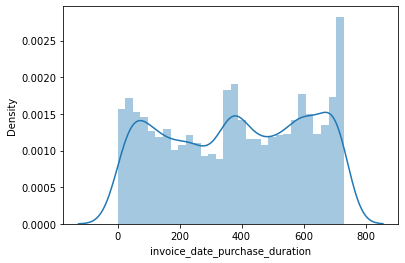

In [215]:
sns.distplot((summary_df['invoice_date_purchase_duration']), bins=30)

#### Time-series Revenue from Repeat vs. Non-repeat Customers 

In [244]:
monthly_rev_repeat_customers_df = invoice_customer_df.set_index('invoice_date').groupby([
    pd.Grouper(freq='M'), 'customer_id'
]).filter(lambda x: len(x) > 1).resample('M').sum()['sales']

In [245]:
monthly_rev_perc_repeat_customers_df = monthly_rev_repeat_customers_df/monthly_revenue_df * 100.0

In [246]:
monthly_rev_repeat_customers_df

invoice_date
2009-12-31    427135.98
2010-01-31    294491.11
2010-02-28    259800.41
2010-03-31    349930.99
2010-04-30    268604.96
2010-05-31    288950.68
2010-06-30    336419.73
2010-07-31    325896.47
2010-08-31    309468.72
2010-09-30    420836.54
2010-10-31    521652.02
2010-11-30    697310.45
2010-12-31    554946.08
2011-01-31    220178.94
2011-02-28    187552.99
2011-03-31    258802.60
2011-04-30    182967.87
2011-05-31    352365.70
2011-06-30    374029.34
2011-07-31    312725.59
2011-08-31    308304.78
2011-09-30    494096.87
2011-10-31    529859.56
2011-11-30    697432.74
Freq: M, Name: sales, dtype: float64

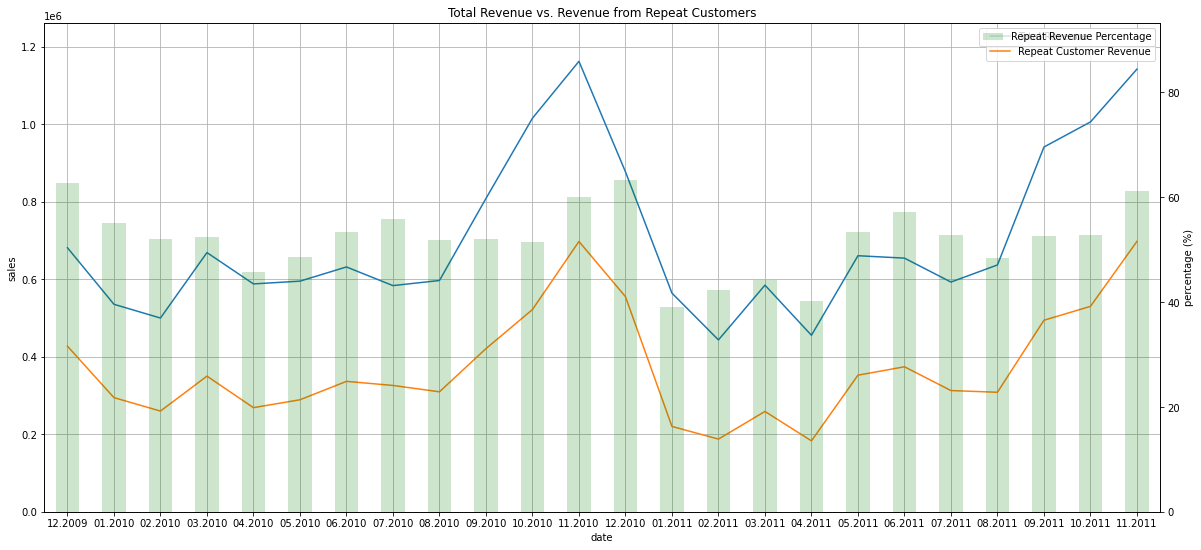

In [253]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(figsize=(20,9))

pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(
    ax=ax,
    grid=True,
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Revenue from Repeat Customers')

ax.legend(['Total Revenue', 'Repeat Customer Revenue'])

ax.set_ylim([0, max(monthly_revenue_df.values)+100000])

ax2 = ax.twinx()

pd.DataFrame(monthly_rev_perc_repeat_customers_df.values).plot(
    ax=ax2,
    kind='bar',
    color='g',
    alpha=0.2
)

ax2.set_ylim([0, max(monthly_rev_perc_repeat_customers_df.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])

ax2.set_xticklabels([
    x.strftime('%m.%Y') for x in monthly_rev_perc_repeat_customers_df.index
])

plt.show()

### Total Revenue

In [ ]:
# Calculate total sales
total_revenue = round(df["total_sales_value"].sum(),2)
print("The total revenue of the business is GBP",total_revenue)

### Most profitable countries

In [ ]:
df["country"].value_counts()

In [ ]:
#revenue per country
revenue_per_country = df.groupby(["country"])["total_sales_value"].sum().sort_values(ascending=False)
revenue_per_country = revenue_per_country.to_frame()
revenue_per_country.head(10)

In [ ]:
#Excluding the UK from the dataset
country = revenue_per_country[revenue_per_country.index != 'United Kingdom']

#Plotting 
g = sns.barplot(x = "total_sales_value", y = country.index , data = country, color = 'cyan')
g.figure.set_size_inches(12, 10)
g.set_xlabel("Revenue in GBP", size = 12)
g.set_ylabel("country", size = 12)
g.set_title("Revenue in Countries outside the UK", size = 14, y = 1.05)

plt.show()

### Checking Multicorrelinilaty

In [ ]:
##def normalize(X):
##    X_mean=X.mean(axis=0)
##    X_std=X.std(axis=0)
##    X_std[X_std==0]=1.0
##    X = (X-X_mean)/X_std
##    return X

#X_num = normalize(X_num)

In [ ]:
#X_scaled=StandardScaler().fit_transform(numericals_features)
#X_scaled.shape

### Checking Multicorrelinilaty

In [ ]:
correlations = numericals_features.corr()
print(correlations)
cmap = sns.cm.rocket_r  ## for reversing the colors
mask=np.zeros_like(numericals_features.corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(10, 8))
ax=sns.heatmap(numericals_features.corr(), mask=mask, annot=True,cmap=cmap)
plt.show()

### Export

In [ ]:
#orders_df.to_excel("clv_clean.xlsx") 

## Part III: Predicting 3-Month CLV

## 4.1. Data Preparation

In [107]:
clv_freq = '3M'

In [108]:
data_df = orders_df.reset_index().groupby([
    'customer_id',
    pd.Grouper(key='invoice_date', freq=clv_freq)
]).agg({
    'sales': [sum, groupby_mean, groupby_count],
})

In [109]:
data_df.columns = ['_'.join(col).lower() for col in data_df.columns]

In [110]:
data_df = data_df.reset_index()

In [111]:
data_df.head(10)

,customer_id,invoice_date,sales_sum,sales_avg,sales_count
0,12346,2010-03-31,27.05,27.050,1.0
1,12346,2010-06-30,142.31,142.310,1.0
2,12346,2011-03-31,77183.60,77183.600,1.0
3,12347,2010-12-31,2035.11,1017.555,2.0
4,12347,2011-03-31,475.39,475.390,1.0
5,12347,2011-06-30,1018.77,509.385,2.0
6,12347,2011-09-30,584.91,584.910,1.0
7,12347,2011-12-31,1294.32,1294.320,1.0
8,12348,2010-09-30,221.16,221.160,1.0
9,12348,2010-12-31,652.80,652.800,1.0


In [112]:
date_month_map = {
    str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(
        sorted(data_df.reset_index()['invoice_date'].unique(), reverse=True)
    )
}

In [113]:
data_df['M'] = data_df['invoice_date'].apply(lambda x: date_month_map[str(x)[:10]])

In [114]:
date_month_map

{'2011-12-31': 'M_1',
 '2011-09-30': 'M_2',
 '2011-06-30': 'M_3',
 '2011-03-31': 'M_4',
 '2010-12-31': 'M_5',
 '2010-09-30': 'M_6',
 '2010-06-30': 'M_7',
 '2010-03-31': 'M_8',
 '2009-12-31': 'M_9'}

In [115]:
data_df.head(10)

,customer_id,invoice_date,sales_sum,sales_avg,sales_count,M
0,12346,2010-03-31,27.05,27.050,1.0,M_8
1,12346,2010-06-30,142.31,142.310,1.0,M_7
2,12346,2011-03-31,77183.60,77183.600,1.0,M_4
3,12347,2010-12-31,2035.11,1017.555,2.0,M_5
4,12347,2011-03-31,475.39,475.390,1.0,M_4
5,12347,2011-06-30,1018.77,509.385,2.0,M_3
6,12347,2011-09-30,584.91,584.910,1.0,M_2
7,12347,2011-12-31,1294.32,1294.320,1.0,M_1
8,12348,2010-09-30,221.16,221.160,1.0,M_6
9,12348,2010-12-31,652.80,652.800,1.0,M_5


#### - Building Sample Set

In [116]:
features_df = pd.pivot_table(
    data_df.loc[data_df['M'] != 'M_1'], 
    values=['sales_sum', 'sales_avg', 'sales_count'], 
    columns='M', 
    index='customer_id'
)

In [117]:
features_df.columns = ['_'.join(col) for col in features_df.columns]

In [118]:
features_df.shape

(5412, 24)

In [156]:
#POTENTIAL TEST & INTERVENTION
features_df_test = features_df.drop(columns=['sales_avg_M_9', 'sales_count_M_9', 'sales_sum_M_9'])

In [157]:
#features_df.head(10)
features_df_test

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_avg_M_6,sales_avg_M_7,sales_avg_M_8,sales_count_M_2,sales_count_M_3,sales_count_M_4,...,sales_count_M_6,sales_count_M_7,sales_count_M_8,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,sales_sum_M_6,sales_sum_M_7,sales_sum_M_8
customer_id,,,,,,,,,,,,,,,,,,,,,
12346,NaN,NaN,77183.600000,NaN,NaN,142.31,27.05,NaN,NaN,1.0,...,NaN,1.0,1.0,NaN,NaN,77183.60,NaN,NaN,142.31,27.05
12347,584.910000,509.3850,475.390000,1017.555,NaN,NaN,NaN,1.0,2.0,1.0,...,NaN,NaN,NaN,584.91,1018.77,475.39,2035.11,NaN,NaN,NaN
12348,270.000000,327.0000,187.440000,652.800,221.16,NaN,NaN,1.0,1.0,1.0,...,1.0,NaN,NaN,270.00,327.00,187.44,652.80,221.16,NaN,NaN
12349,NaN,NaN,NaN,1152.620,NaN,1068.52,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,1152.62,NaN,1068.52,NaN
12350,NaN,NaN,294.400000,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,294.40,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18283,91.363333,130.6825,105.966667,97.675,92.00,NaN,118.14,3.0,4.0,3.0,...,1.0,NaN,3.0,274.09,522.73,317.90,195.35,92.00,NaN,354.42
18284,NaN,NaN,NaN,411.680,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,411.68,NaN,NaN,NaN
18285,NaN,NaN,NaN,NaN,NaN,NaN,377.00,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,377.00


In [158]:
#features_df = features_df.fillna(0)
features_df_test = features_df.fillna(0)

In [159]:
#features_df.head()
features_df_test.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_avg_M_6,sales_avg_M_7,sales_avg_M_8,sales_avg_M_9,sales_count_M_2,sales_count_M_3,...,sales_count_M_8,sales_count_M_9,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,sales_sum_M_6,sales_sum_M_7,sales_sum_M_8,sales_sum_M_9
customer_id,,,,,,,,,,,,,,,,,,,,,
12346,0.00,0.000,77183.60,0.000,0.00,142.31,27.05,0.0,0.0,0.0,...,1.0,0.0,0.00,0.00,77183.60,0.00,0.00,142.31,27.05,0.0
12347,584.91,509.385,475.39,1017.555,0.00,0.00,0.00,0.0,1.0,2.0,...,0.0,0.0,584.91,1018.77,475.39,2035.11,0.00,0.00,0.00,0.0
12348,270.00,327.000,187.44,652.800,221.16,0.00,0.00,0.0,1.0,1.0,...,0.0,0.0,270.00,327.00,187.44,652.80,221.16,0.00,0.00,0.0
12349,0.00,0.000,0.00,1152.620,0.00,1068.52,0.00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00,1152.62,0.00,1068.52,0.00,0.0
12350,0.00,0.000,294.40,0.000,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,294.40,0.00,0.00,0.00,0.00,0.0


In [160]:
response_df = data_df.loc[
    data_df['M'] == 'M_1',
    ['customer_id', 'sales_sum']
]

In [161]:
response_df.columns = ['customer_id', 'CLV_'+clv_freq]

In [162]:
response_df.shape

(2405, 2)

In [163]:
response_df.head(10)

,customer_id,CLV_3M
7,12347,1294.32
15,12349,1457.55
21,12352,231.73
30,12356,58.35
32,12357,6207.67
43,12359,2876.85
49,12360,923.78
57,12362,1909.85
61,12364,269.06
71,12370,739.28


In [164]:
#sample_set_df = features_df.merge(
 #   response_df, 
  #  left_index=True, 
   # right_on='customer_id',
    #how='left'
#)

sample_set_df = features_df_test.merge(
    response_df, 
    left_index=True, 
    right_on='customer_id',
    how='left'
)

In [165]:
sample_set_df.shape

(5412, 26)

In [166]:
sample_set_df.head(10)

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_avg_M_6,sales_avg_M_7,sales_avg_M_8,sales_avg_M_9,sales_count_M_2,sales_count_M_3,...,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,sales_sum_M_6,sales_sum_M_7,sales_sum_M_8,sales_sum_M_9,customer_id,CLV_3M
NaN,0.00,0.000,77183.6000,0.000,0.00,142.31,27.05,0.0,0.0,0.0,...,0.00,0.00,77183.60,0.00,0.00,142.31,27.05,0.0,12346,NaN
7.0,584.91,509.385,475.3900,1017.555,0.00,0.00,0.00,0.0,1.0,2.0,...,584.91,1018.77,475.39,2035.11,0.00,0.00,0.00,0.0,12347,1294.32
NaN,270.00,327.000,187.4400,652.800,221.16,0.00,0.00,0.0,1.0,1.0,...,270.00,327.00,187.44,652.80,221.16,0.00,0.00,0.0,12348,NaN
15.0,0.00,0.000,0.0000,1152.620,0.00,1068.52,0.00,0.0,0.0,0.0,...,0.00,0.00,0.00,1152.62,0.00,1068.52,0.00,0.0,12349,1457.55
NaN,0.00,0.000,294.4000,0.000,0.00,0.00,0.00,0.0,0.0,0.0,...,0.00,0.00,294.40,0.00,0.00,0.00,0.00,0.0,12350,NaN
NaN,0.00,0.000,0.0000,300.930,0.00,0.00,0.00,0.0,0.0,0.0,...,0.00,0.00,0.00,300.93,0.00,0.00,0.00,0.0,12351,NaN
21.0,256.25,0.000,160.3775,171.900,0.00,0.00,0.00,0.0,2.0,0.0,...,512.50,0.00,641.51,343.80,0.00,0.00,0.00,0.0,12352,231.73
NaN,0.00,89.000,0.0000,317.760,0.00,0.00,0.00,0.0,0.0,1.0,...,0.00,89.00,0.00,317.76,0.00,0.00,0.00,0.0,12353,NaN
NaN,0.00,1079.400,0.0000,0.000,0.00,0.00,0.00,0.0,0.0,1.0,...,0.00,1079.40,0.00,0.00,0.00,0.00,0.00,0.0,12354,NaN
NaN,0.00,459.400,0.0000,0.000,0.00,488.21,0.00,0.0,0.0,1.0,...,0.00,459.40,0.00,0.00,0.00,488.21,0.00,0.0,12355,NaN


In [167]:
sample_set_df = sample_set_df.fillna(0)

In [168]:
sample_set_df.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_avg_M_6,sales_avg_M_7,sales_avg_M_8,sales_avg_M_9,sales_count_M_2,sales_count_M_3,...,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,sales_sum_M_6,sales_sum_M_7,sales_sum_M_8,sales_sum_M_9,customer_id,CLV_3M
NaN,0.00,0.000,77183.60,0.000,0.00,142.31,27.05,0.0,0.0,0.0,...,0.00,0.00,77183.60,0.00,0.00,142.31,27.05,0.0,12346,0.00
7.0,584.91,509.385,475.39,1017.555,0.00,0.00,0.00,0.0,1.0,2.0,...,584.91,1018.77,475.39,2035.11,0.00,0.00,0.00,0.0,12347,1294.32
NaN,270.00,327.000,187.44,652.800,221.16,0.00,0.00,0.0,1.0,1.0,...,270.00,327.00,187.44,652.80,221.16,0.00,0.00,0.0,12348,0.00
15.0,0.00,0.000,0.00,1152.620,0.00,1068.52,0.00,0.0,0.0,0.0,...,0.00,0.00,0.00,1152.62,0.00,1068.52,0.00,0.0,12349,1457.55
NaN,0.00,0.000,294.40,0.000,0.00,0.00,0.00,0.0,0.0,0.0,...,0.00,0.00,294.40,0.00,0.00,0.00,0.00,0.0,12350,0.00


In [169]:
sample_set_df['CLV_'+clv_freq].describe()

count     5412.000000
mean       357.494632
std       1905.160645
min          0.000000
25%          0.000000
50%          0.000000
75%        306.887500
max      68012.350000
Name: CLV_3M, dtype: float64

## 4.2. Regression Models

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
target_var = 'CLV_'+clv_freq
all_features = [x for x in sample_set_df.columns if x not in ['customer_id', target_var]]

In [191]:
x_train, x_test, y_train, y_test = train_test_split(
    sample_set_df[all_features], 
    sample_set_df[target_var], 
    test_size=0.32
)

#### - Linear Regression Model

In [192]:
from sklearn.linear_model import LinearRegression

# Try these models as well
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [193]:
reg_fit = LinearRegression()

In [194]:
reg_fit.fit(x_train, y_train)

LinearRegression()

In [195]:
reg_fit.intercept_

14.517173138802605

In [196]:
coef = pd.DataFrame(list(zip(all_features, reg_fit.coef_)))
coef.columns = ['feature', 'coef']

coef

,feature,coef
0,sales_avg_M_2,-0.189867
1,sales_avg_M_3,0.133486
2,sales_avg_M_4,0.092011
3,sales_avg_M_5,-0.099980
4,sales_avg_M_6,0.118559
5,sales_avg_M_7,0.097295
6,sales_avg_M_8,-0.119598
7,sales_avg_M_9,0.541831
8,sales_count_M_2,134.531989
9,sales_count_M_3,8.326217


## 4.3. Evaluation

In [197]:
from sklearn.metrics import r2_score, median_absolute_error

In [198]:
train_preds =  reg_fit.predict(x_train)
test_preds = reg_fit.predict(x_test)

#### - R-Squared

In [199]:
print('In-Sample R-Squared: %0.4f' % r2_score(y_true=y_train, y_pred=train_preds))
print('Out-of-Sample R-Squared: %0.4f' % r2_score(y_true=y_test, y_pred=test_preds))

In-Sample R-Squared: 0.7685
Out-of-Sample R-Squared: 0.7305


#### - Adjusted R squared

In [ ]:
adjusted_r = 1 - (1 - reg_fit.score(x_train, y_train))*(len(y_train) - 1)/(len(y_train) - x_train.shape[1]-1)
adjusted_r

#### - Median Absolute Error

In [200]:
print('In-Sample MSE: %0.4f' % median_absolute_error(y_true=y_train, y_pred=train_preds))
print('Out-of-Sample MSE: %0.4f' % median_absolute_error(y_true=y_test, y_pred=test_preds))

In-Sample MSE: 130.3715
Out-of-Sample MSE: 141.9824


**- MSE - **

In [ ]:
from sklearn.metrics import mean_squared_error as mse
train_mse=mse(model.predict(X_train.to_numpy()), y_train)
test_mse=mse(model.predict(X_test.to_numpy()), y_test)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

**- RMSE - **

In [ ]:
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

#### - Scatter Plot

In [1]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(y_train, train_preds, color='cyan')
plt.plot([0, max(y_train)], [0, max(train_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Train Set - Actual vs. Predicted')
plt.grid()

plt.show()

NameError: name 'plt' is not defined

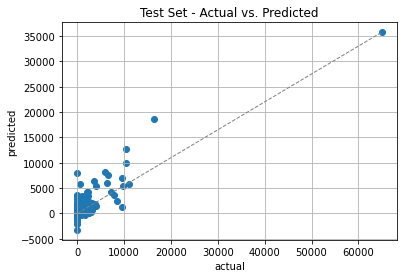

In [204]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(y_test, test_preds, color='cyan')
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Test Set - Actual vs. Predicted')
plt.grid()

plt.show()

### Homoscdasticity

In [ ]:
# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[0,1].hist(y_test - y_pred)
ax[0,1].set_xlabel("Test y-y_pred")
ax[0,1].set_title("Test Set Residual histogram")


# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1,1].hist(y_train - y_pred_train)
ax[1,1].set_xlabel("Train y-y_pred")
ax[1,1].set_title("Train Residual histogram")

In [ ]:
# Coefficient and Intercept

print(lin_reg.coef_)
print(lin_reg.intercept_)

In [ ]:
y_pred = lin_reg.predict(x_train)
x_train["CLV_3M"] = y_pred
x_train

In [ ]:
x_train["CLV_3M"].describe()

In [ ]:
x_train.to_excel("result_train.xlsx") 

In [ ]:
y_pred2 = lin_reg.predict(X_test)
x_test["CLV_3M"] = y_pred2
x_test

In [ ]:
x_test["CLV_3M"].describe()

In [ ]:
x_test.to_excel("result_test.xlsx") 